J. Purpose
-------------------------
Measure the performance of the agent versus episodes for simple four towers scenario with friendly units.   
Unit types, hit points and unit gourp position are fixed.

I. Screenshot of Scenario
-------------------------
<img src="img\FETowersTfHfPf\FETowersTfHfPf_ScreenShot.png" alt="drawing" width="600"/>

H. Scenario/Map dynamics
------------------------
- **how units are generated:** fixed units with full hit point
- **how many units are generated:**  
   - 4 self units(center)  
   - 4 friendly units(Top-rigt)  
   - 4 weakeast enemy units(Top-left)  
   - 4 middle strength enemy units(Bottom-right)  
   - 2 strongest enemy units(Bottom-left)

- **where units are generated:** fixed position
- **the condition of end an episode:** The self-unit is death
- **remarks:** Reset the enemy units and friendly units after a group of enemy units or friendly units is death

G. results
------------------------



Learning curve: 


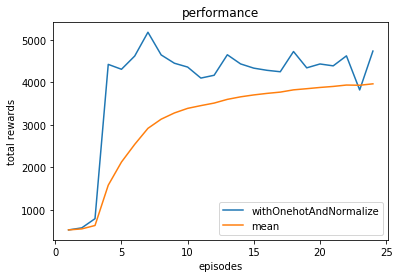

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
print("\nLearning curve: ")
RESULT_FILE = "FETowersTfHfPf_results.txt"
result_dir = os.path.join(os.getcwd(), "results", RESULT_FILE)

def plot(x, y, legend):
    plt.figure(num = 1)
    plt.plot(x,y)
    plt.title('performance')
    plt.legend(legend)
    plt.xlabel("episodes")
    plt.ylabel("total rewards")
    
def readResult(dir):
    x = []
    y = []
    f = open(dir, 'r')
    lines = f.readlines()
    episode_size = int(lines[0])
    for i,l in enumerate(lines[1:]):
        y.append(float(l[0:-1]))
        x.append((i + 1) * episode_size)
    return x,y

def mean(y):
    meany = []
    sum = 0
    for i, v in enumerate(y):
        sum += v
        meany.append(sum / (i + 1))
    return meany
x, y = readResult(result_dir)
my = mean(y)
plot(x, y,["withOnehotAndNormalize"])
plot(x,my, ["withOnehotAndNormalize","mean"])

F.  Input layers  
-----------------------------------------------   
    player_id  (one-hot)  
    unit_type  (one-hot)  
    hit_point  (normalized)  
    hit_point_ratio  (normalized)
    unit_density  (normalized)  
spec for agent training, hyperparameters, etc
-----------------------------------------------
- neuros network.yml:  
```python
networks:
  - name: "damageToMarine"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByMarine"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageToZergling"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByZergling"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageToMarauder"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByMarauder"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageToHydralisk"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByHydralisk"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageToThor"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByThor"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageToUltralisk"
    layers:
        - type: "FC"
          neurons: 250
  - name: "damageByUltralisk"
    layers:
        - type: "FC"
          neurons: 250
  - name: "penalty"
    layers:
        - type: "FC"
          neurons: 250
input_shape:
    - 20800
output_shape: 4
shared_layers: [] #TODO
aggeregator: "average" #TODO
summaries_step: 100
```


- reinforce.yml: 
```python
decay_steps: 300
starting_epsilon: 1
discount_factor: 0.99
batch_size: 16
memory_size: 100
update_frequency: 10
```

E. commands used to generate results
-----------------------------------  
`% cd abp`  
  
  
start visdom  
`% visdom`

run example  
Change code of [FourTowerSequentialFriendlyUnits_onehot.py](https://github.com/osu-xai/abp/blob/master/abp/openai/envs/four_towers_friendly_units/FourTowerSequentialFriendlyUnits_onehot.py) to point 
to 'FourTowersWithFriendlyUnitsFixedEnemies' map  
`% python -m abp.trainer.task_runner -f tasks/four_towers_friendly_units/hra/v1 -t abp.examples.pysc2.four_towers_friendly_units.hra`

D. software packages, versions 
------------------------------
Starcraft II 4.1.2  
Repo: https://github.com/osu-xai/abp branch: lzx_abp_branch

environment replication steps commands used to position them
------------------------------------------------------------
`git clone https://github.com/osu-xai/abp
cd abp
git checkout lzx_abp_branch
pip3 install -r requirements.txt
python3 setup.py install`

git status output
------------------
`On branch lzx_abp_branch
Your branch is up to date with 'origin/lzx_abp_branch'.`

C. python
------
Python 3.6.4

B. GPU stack
---------
pytorch 0.4.1  
tensorflow 1.6.0

A. OS
--
Ubuntu 64bit 18.04.1